In [38]:
import pandas as pd
import numpy as np

a = {
#     "Customer_ID": [i for i in range(1, 21)],
    "Gender": ['M','M','M','M','M','M','F','F','F','F','M','M','M','M','F','F','F','F','F','F'],
    "Car Type": ['family', 'sports', 'sports', 'sports', 'sports', 'sports', 'sports', 'sports', 'sports', 'sports', 
                 'luxury', 'family', 'family', 'family', 'luxury', 'luxury', 'luxury', 'luxury', 'luxury', 'luxury'],
    "shirt size": ['small', 'medium', 'medium', 'large', 'extra large', 'extra large', 'small', 'small',
                  'medium', 'large', 'large', 'extra large', 'medium', 'extra large', 'small', 'small',
                  'medium', 'medium', 'medium', 'large'],
    "class": ['C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 
             'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1']
    
    }

data = pd.DataFrame(a)
data

Gender Car Type   shirt size class
0       M   family        small    C0
1       M   sports       medium    C0
2       M   sports       medium    C0
3       M   sports        large    C0
4       M   sports  extra large    C0
5       M   sports  extra large    C0
6       F   sports        small    C0
7       F   sports        small    C0
8       F   sports       medium    C0
9       F   sports        large    C0
10      M   luxury        large    C1
11      M   family  extra large    C1
12      M   family       medium    C1
13      M   family  extra large    C1
14      F   luxury        small    C1
15      F   luxury        small    C1
16      F   luxury       medium    C1
17      F   luxury       medium    C1
18      F   luxury       medium    C1
19      F   luxury        large    C1

# Label transformation for data processing

In [39]:
from sklearn import preprocessing
#apply to entire df
data_encoder = data.apply(preprocessing.LabelEncoder().fit_transform)

In [40]:
Y = data_encoder.iloc[:, -1].values
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
X = data_encoder.iloc[:, :-1].values
X

array([[1, 0, 3],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 0],
       [1, 2, 0],
       [0, 2, 3],
       [0, 2, 3],
       [0, 2, 2],
       [0, 2, 1],
       [1, 1, 1],
       [1, 0, 0],
       [1, 0, 2],
       [1, 0, 0],
       [0, 1, 3],
       [0, 1, 3],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 1]])

In [54]:
data_encoder

Gender  Car Type  shirt size  class
0        1         0           3      0
1        1         2           2      0
2        1         2           2      0
3        1         2           1      0
4        1         2           0      0
5        1         2           0      0
6        0         2           3      0
7        0         2           3      0
8        0         2           2      0
9        0         2           1      0
10       1         1           1      1
11       1         0           0      1
12       1         0           2      1
13       1         0           0      1
14       0         1           3      1
15       0         1           3      1
16       0         1           2      1
17       0         1           2      1
18       0         1           2      1
19       0         1           1      1

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [43]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini' ,  random_state=0)
clf = clf.fit(X_train, y_train)

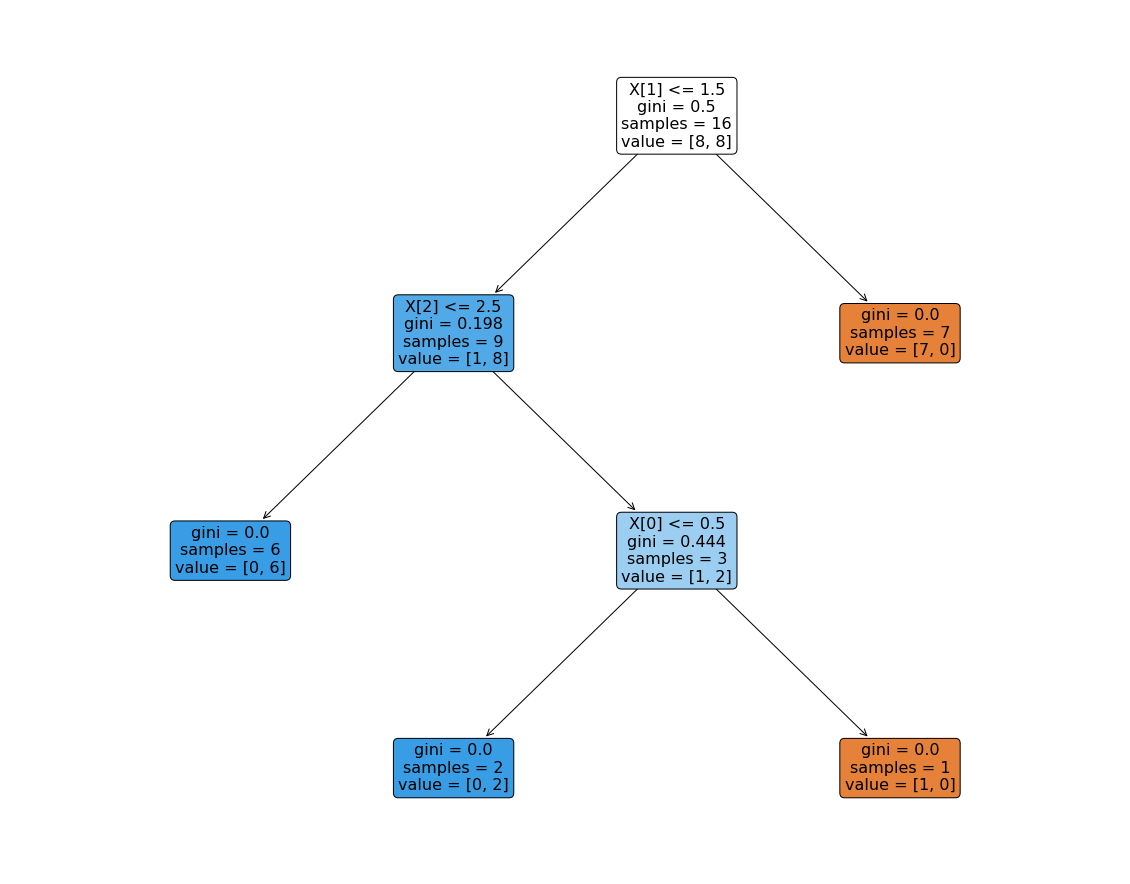

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,16))
tree.plot_tree(clf, fontsize = 16,rounded = True , filled = True);

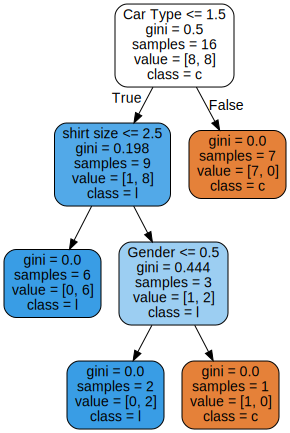

In [57]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=['Gender', 'Car Type', 'shirt size' ],  
                     class_names='class',  
                     filled=True, rounded=True )  
graph = graphviz.Source(dot_data)  
graph 

In [60]:
y_pred = clf.predict(X_test)


In [61]:
from sklearn.metrics import classification_report
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

